# Salarios 1988 USA ☕

# Primero, adaptamos la data y hacemos pruebas ☝

Objetivo: Con la información del censo de población de USA del año de 1988, analice las posibles relaciones que puedan existir entre las variables contempladas y, con base en ello, construya un modelo para explicar el comportamiento de los salarios.

In [26]:
#Primero instalamos todos los paquetes y fuentes de datos requeridos
install.packages('AER') # Instalamos Applied Econometrics with R
library(AER) #Supongo que aquí la invocamos
install.packages('quantreg') #Quantile Regression
library("quantreg")
install.packages("lmtest") #Norm Tests
library(lmtest)
install.packages("lawstat") #Norm Tests
library(lawstat)
install.packages("ggcorrplot") #Norm Tests
library(ggcorrplot) #correlation plot
install.packages("ggplot2")
library(ggplot2) # nice looking plots
install.packages("ggfortify")
library(ggfortify)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [27]:
#Ahora los datos con los que vamos a trabajar
data("CPS1988") #Cross-section March 1988 Survey by the US Census Bureau.
str(CPS1988)
summary(CPS1988)

'data.frame':	28155 obs. of  7 variables:
 $ wage      : num  355 123 370 755 594 ...
 $ education : int  7 12 9 11 12 16 8 12 12 14 ...
 $ experience: int  45 1 9 46 36 22 51 34 0 18 ...
 $ ethnicity : Factor w/ 2 levels "cauc","afam": 1 1 1 1 1 1 1 1 1 1 ...
 $ smsa      : Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ region    : Factor w/ 4 levels "northeast","midwest",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ parttime  : Factor w/ 2 levels "no","yes": 1 2 1 1 1 1 1 1 1 1 ...


      wage            education       experience   ethnicity     smsa      
 Min.   :   50.05   Min.   : 0.00   Min.   :-4.0   cauc:25923   no : 7223  
 1st Qu.:  308.64   1st Qu.:12.00   1st Qu.: 8.0   afam: 2232   yes:20932  
 Median :  522.32   Median :12.00   Median :16.0                           
 Mean   :  603.73   Mean   :13.07   Mean   :18.2                           
 3rd Qu.:  783.48   3rd Qu.:15.00   3rd Qu.:27.0                           
 Max.   :18777.20   Max.   :18.00   Max.   :63.0                           
       region     parttime   
 northeast:6441   no :25631  
 midwest  :6863   yes: 2524  
 south    :8760              
 west     :6091              
                             
                             

In [28]:
#Pasamos el set a una variable llamada original
#Pasamos datos categoricos a datos numéricos
#Mostramos el inicio del dataframe

original <- CPS1988
datos <- CPS1988
datos[sapply(datos, is.factor)] <- data.matrix(CPS1988[sapply(CPS1988, is.factor)])
head(datos)

,wage,education,experience,ethnicity,smsa,region,parttime
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,354.94,7,45,1,2,1,1
2,123.46,12,1,1,2,1,2
3,370.37,9,9,1,2,1,1
4,754.94,11,46,1,2,1,1
5,593.54,12,36,1,2,1,1
6,377.23,16,22,1,2,1,1


In [29]:
#Para fines comparativos también visualizamos los datos originales
head(original)

,wage,education,experience,ethnicity,smsa,region,parttime
,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
1,354.94,7,45,cauc,yes,northeast,no
2,123.46,12,1,cauc,yes,northeast,yes
3,370.37,9,9,cauc,yes,northeast,no
4,754.94,11,46,cauc,yes,northeast,no
5,593.54,12,36,cauc,yes,northeast,no
6,377.23,16,22,cauc,yes,northeast,no


In [30]:
#Matriz de correlación para las 7 variables, si por favor
#Primero redondeamos un poquitillo
mydf <- round(cor(datos),2)
head(mydf)

,wage,education,experience,ethnicity,smsa,region,parttime
wage,1.00,0.30,0.19,-0.10,0.11,-0.04,-0.26
education,0.30,1.00,-0.29,-0.08,0.09,-0.04,-0.01
experience,0.19,-0.29,1.00,0.01,-0.04,-0.02,-0.09
ethnicity,-0.10,-0.08,0.01,1.00,0.05,0.02,0.02
smsa,0.11,0.09,-0.04,0.05,1.00,-0.09,0.00
region,-0.04,-0.04,-0.02,0.02,-0.09,1.00,0.03


In [31]:
#Hacemos un reshape - melt - para hacer la correlation matrix
library(reshape2)
mdf <- melt(mydf)
head(mdf)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,wage,wage,1.00
2,education,wage,0.30
3,experience,wage,0.19
4,ethnicity,wage,-0.10
5,smsa,wage,0.11
6,region,wage,-0.04


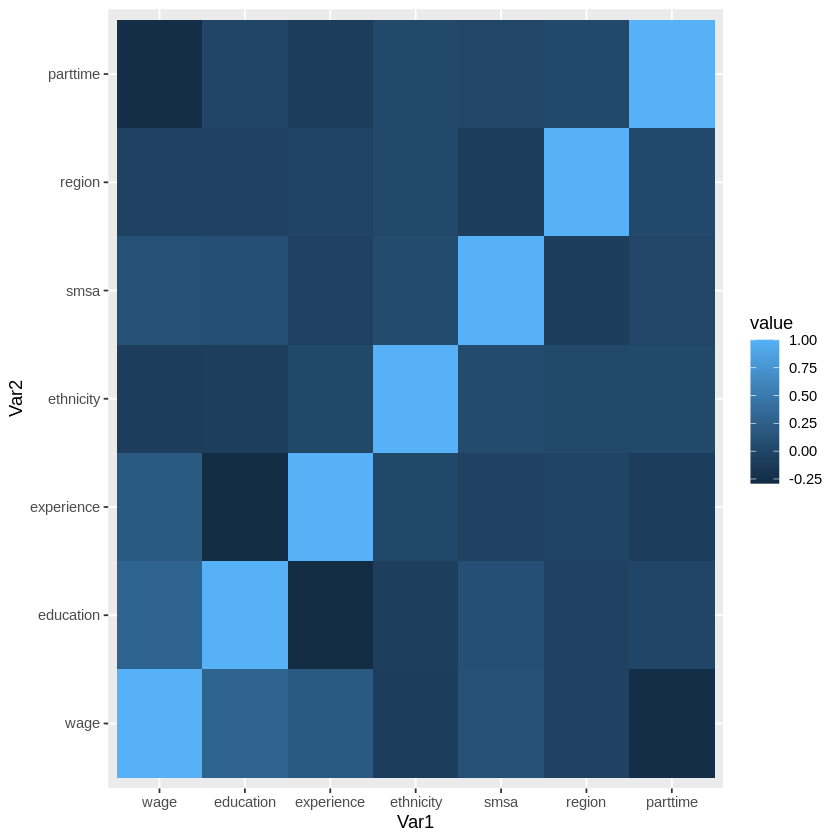

In [32]:
#Hacemos un pequeño gráfico de correlación entre variables
ggplot(data = mdf, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile()

# Modelo de Regresión Lineal Simple con Log(Wage) ⭐

In [33]:
# Generamos nuestro modelo con 1 variable dependiente y 6 independientes
modelo <- lm(log(wage) ~education+experience+ethnicity+smsa+region+parttime, data = datos)
# Redondeamos los coeficientes del modelo para simplicidad
round(modelo$coefficients)

(Intercept)   education  experience   ethnicity        smsa      region 
          6           0           0           0           0           0 
   parttime 
         -1

# Interpretaciones del RESUMEN MODELO ℹ

In [34]:
#Finalmente, hacemos un resumen de nuestro modelo para analizarlo
summary(modelo)


Call:
lm(formula = log(wage) ~ education + experience + ethnicity + 
    smsa + region + parttime, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7024 -0.3165  0.0374  0.3505  3.9376 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.8116272  0.0300203 193.590  < 2e-16 ***
education    0.0932025  0.0011872  78.505  < 2e-16 ***
experience   0.0171774  0.0002627  65.392  < 2e-16 ***
ethnicity   -0.2369203  0.0121735 -19.462  < 2e-16 ***
smsa         0.1615659  0.0075625  21.364  < 2e-16 ***
region      -0.0127608  0.0030816  -4.141 3.47e-05 ***
parttime    -1.0696006  0.0115188 -92.857  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5491 on 28148 degrees of freedom
Multiple R-squared:  0.4119,	Adjusted R-squared:  0.4118 
F-statistic:  3286 on 6 and 28148 DF,  p-value: < 2.2e-16


# Análisis del comportamiento de Residuales ✌

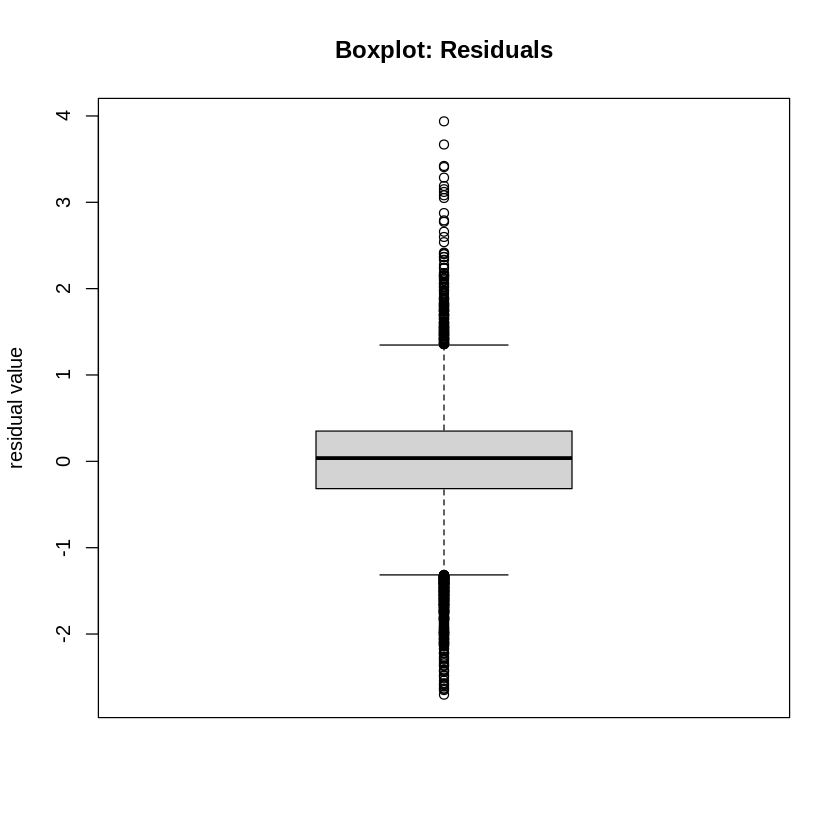

In [35]:
#Podemos ver que la mediana es cercana a cero = a la media
#La media de los residuales debe ser cero
#Hay una distribución simétrica de los residuales
#Lo anterior sugiere una buena elección del modelo
boxplot(modelo[['residuals']],main='Boxplot: Residuals',ylab='residual value')

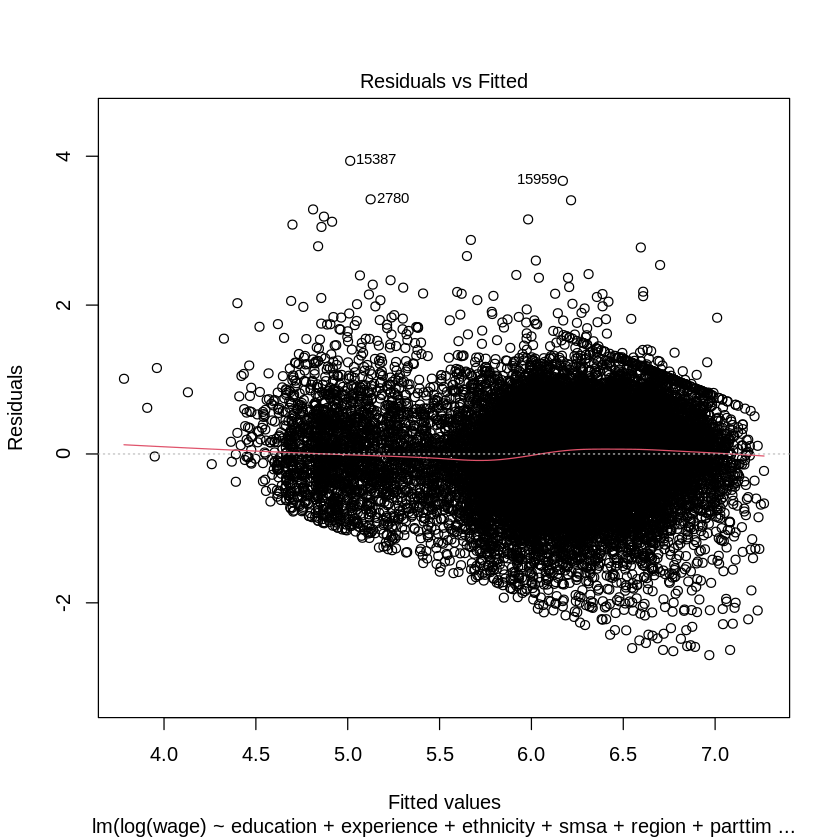

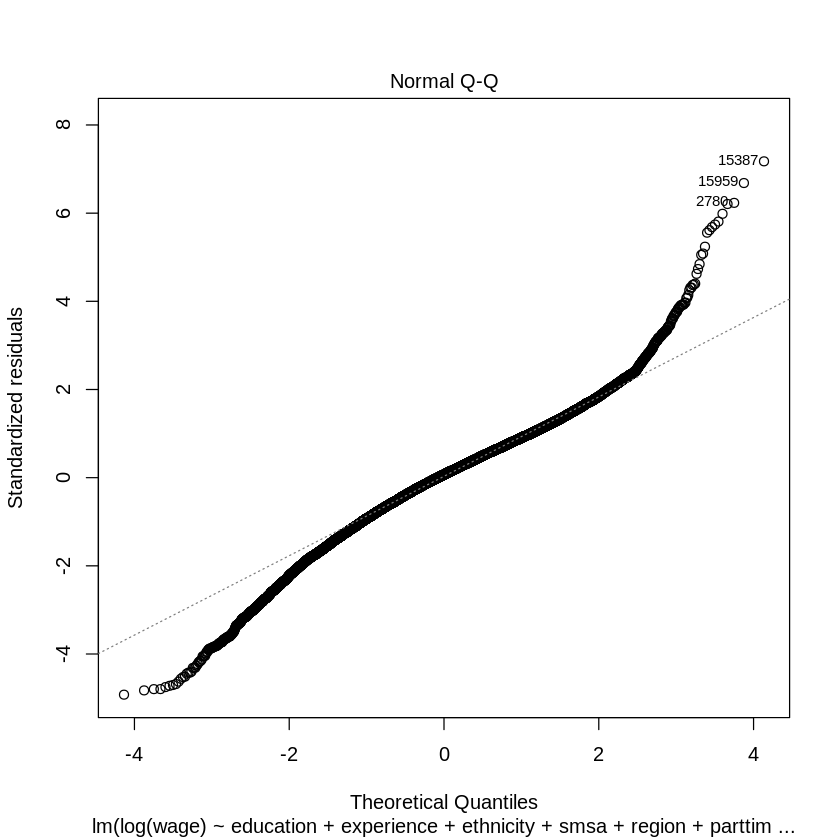

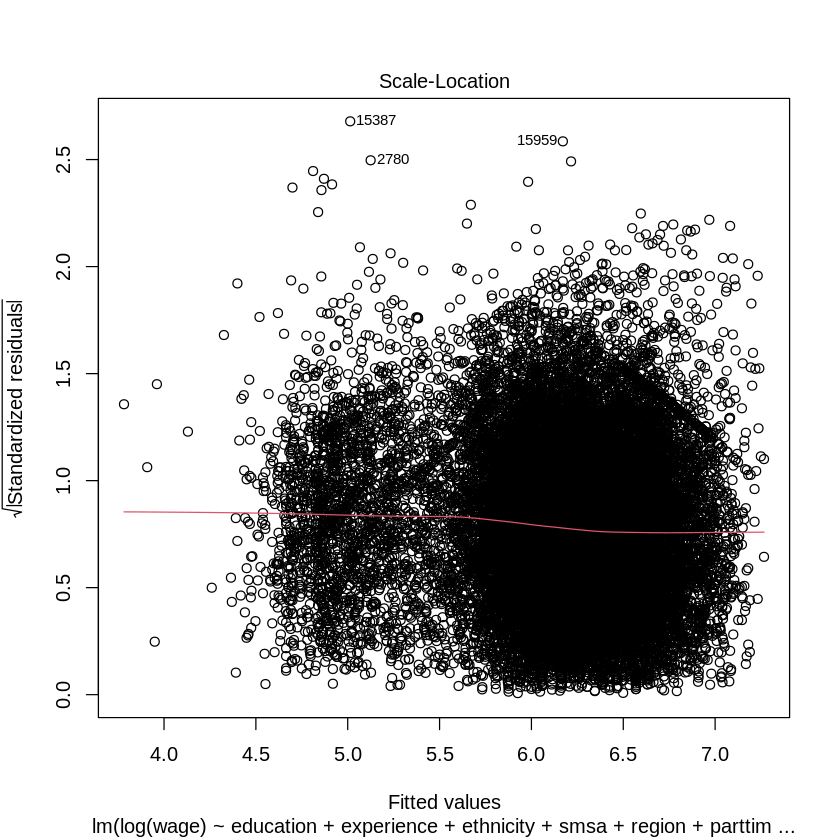

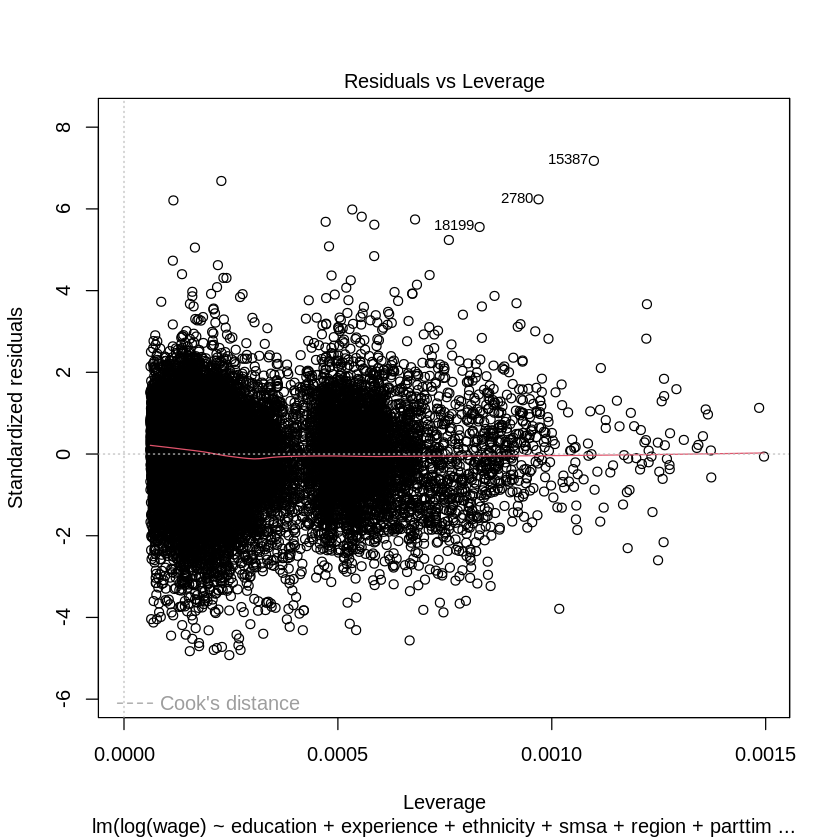

In [36]:
#Un R del 41% no es tan bueno, pero veamos la normalidad de los residuos
#Esto se ve en el gráfico Q-Q plot de autoplot
plot(modelo)

# Estimaciones ⚓

El intercept del modelo es 5.8116272 y eso resolviendo para log(x) x=334.162 que sería el valor esperado de salario cuando todas las otras variables estan dentro de su media

# Error Estándar >> Intervalos de confianza ⚛

In [37]:
#Imprimimos los Low Limits y High Limits para el intervalo de confianza
#Esto al 95% y es decir: media +- 1.96 * estandar error
#Intercept es para la variable WAGE
confint(modelo)

,2.5 %,97.5 %
(Intercept),5.75278598,5.87046851
education,0.09087551,0.09552952
experience,0.01666255,0.01769229
ethnicity,-0.26078089,-0.21305969
smsa,0.14674310,0.17638872
region,-0.01880096,-0.00672063
parttime,-1.09217798,-1.04702316


In [38]:
#Con el Test Durbin Watson vemos que los residuales no están autocorrelacionados
dwtest(modelo)


	Durbin-Watson test

data:  modelo
DW = 1.8379, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


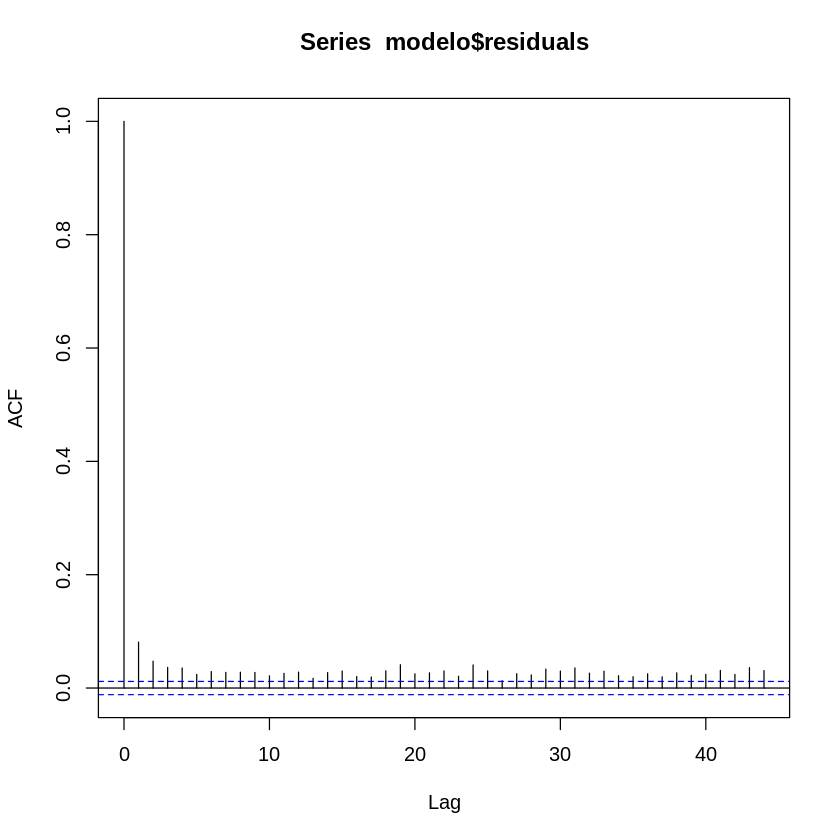

In [39]:
acf(modelo$residuals)

# Homocedastasidad ♒

In [24]:
bptest(modelo)


	studentized Breusch-Pagan test

data:  modelo
BP = 372.42, df = 6, p-value < 2.2e-16


In [25]:
ncvTest(modelo)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 118.9419, Df = 1, p = < 2.22e-16

Como P value es mucho menos a 0.05 la data no es homocedástica, por lo tanto el error residual entre cada observación de la variable independiente es diferente y cambiante, haciéndonos tener una predicción poco confiable conforme visualizamos los valores de la variable independiente

# Ok nuestro primer modelo tiene una R^2 poco usable para predecir, busquemos otro ☣

In [20]:
#La documentación de R nos propone una forma que en nuestra experiencia puede ser válida
#Considera todas las variables y amplía o castiga algunas relaciones multiplicando variables
#El modelo queda como sigue:
modelo_buchinsky <- log(wage) ~ ethnicity * (education + experience + parttime) + 
  region*smsa + I(experience^2) + I(education^2) + I(education*experience)
modelo2 <- lm(modelo_buchinsky, data = CPS1988)

In [21]:
summary(modelo2)


Call:
lm(formula = modelo_buchinsky, data = CPS1988)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7790 -0.2989  0.0300  0.3282  4.3572 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                3.956e+00  6.224e-02  63.565  < 2e-16 ***
ethnicityafam             -2.054e-01  6.848e-02  -3.000 0.002702 ** 
education                  1.219e-01  7.342e-03  16.601  < 2e-16 ***
experience                 8.475e-02  1.833e-03  46.244  < 2e-16 ***
parttimeyes               -8.713e-01  1.227e-02 -71.040  < 2e-16 ***
regionmidwest             -7.075e-02  2.022e-02  -3.499 0.000468 ***
regionsouth               -6.284e-02  1.976e-02  -3.180 0.001475 ** 
regionwest                 3.968e-04  2.099e-02   0.019 0.984915    
smsayes                    1.797e-01  1.811e-02   9.923  < 2e-16 ***
I(experience^2)           -1.039e-03  2.019e-05 -51.469  < 2e-16 ***
I(education^2)             3.411e-05  2.395e-04   0.142 0.886752    
I(educati

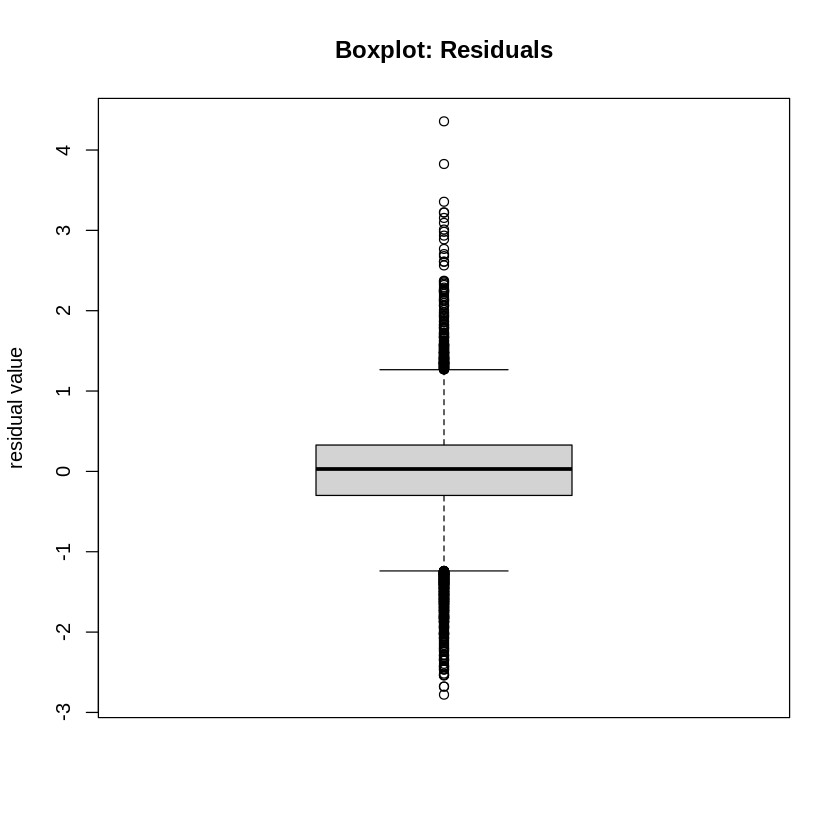

In [22]:
boxplot(modelo2[['residuals']],main='Boxplot: Residuals',ylab='residual value')

# Conclusión ⚾

Ambos modelos nos dan un R^2 muy bajo para predecir, quizá debamos hacer uso de otras formas para generar nuestro modelo

# ANEXOS

Los OLS es decir modelos lineales nos regresan siempre un R^2 < 0.5

In [23]:
## Model equations: Mincer-type, quartic, Buchinsky-type
mincer <- log(wage) ~ ethnicity + education + experience + I(experience^2)
quart <- log(wage) ~ ethnicity + education + experience + I(experience^2) +
  I(experience^3) + I(experience^4)
buchinsky <- log(wage) ~ ethnicity * (education + experience + parttime) + 
  region*smsa + I(experience^2) + I(education^2) + I(education*experience)

## OLS and LAD fits (for LAD see Bierens and Ginter, Tables 1-3.A.)
mincer_ols <- lm(mincer, data = CPS1988)
mincer_lad <- rq(mincer, data = CPS1988)
quart_ols <- lm(quart, data = CPS1988)
quart_lad <- rq(quart, data = CPS1988)
buchinsky_ols <- lm(buchinsky, data = CPS1988)
buchinsky_lad <- rq(buchinsky, data = CPS1988)

Warning message in rq.fit.br(x, y, tau = tau, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ...):
“Solution may be nonunique”
